In [1]:
import win32com.client
#other libraries to be used in this script
import os
from datetime import datetime, timedelta

import spacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 13000000 # or even higher

conn_string = 'Driver={SQL Server}; Server={Server}; Database={Database}; Trusted_Connection=yes;'

In [2]:
def get_email():

    outlook = win32com.client.Dispatch('outlook.application')
    mapi = outlook.GetNamespace("MAPI")

    inbox = mapi.GetDefaultFolder(6)
    messages = inbox.Items

    return messages

def get_common_words(text):
    
    doc = nlp(text)
    
    # all tokens that arent stop words or punctuations
    words = [token.text.lower()
             for token in doc
             if not token.is_stop 
             and not token.is_punct
             and not token.is_space
             and not token.is_bracket
             and not token.like_num]

    # five most common tokens
    word_freq = Counter(words)
    common_words = word_freq.most_common(25) 

    print(common_words)

## Search by key word

In [3]:
import pandas as pd
import pyodbc

keyWord = "QA"

messages = get_email()
body_content = ""

message = messages.GetFirst ()

print ('Email: ')

while message:
    if keyWord in message.Subject or keyWord in message.Body or keyWord in message.SenderName: 
        print ('-' + message.Subject + ' -- ' + message.SenderName)
    message = messages.GetNext ()

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

print (' ')

try:
    conn = pyodbc.connect(conn_string)
    cursor = conn.cursor()

    storedProc = "Exec [dbo].[usp_Get_System_Behavior_By_KeyWord] @KeyWord = ?"
    params = (keyWord)

    # Execute Stored Procedure With Parameters
    cursor.execute( storedProc, params )
    
    print ('Database: ')
    
    # Iterate the cursor
    row = cursor.fetchone()
    while row:
        # Print the row
        print('-' + str(row[0]))
        row = cursor.fetchone()

    # Close the cursor and delete it
    cursor.close()
    del cursor

    # Close the database connection
    conn.close()

except Exception as e:
    print("Error: %s" % e)

Email: 
-Re: Promote Databases to UAT -- Eric Rearte Mariano
-RE: Promote Databases to UAT -- Kurt H Hofmann
-RE: EI - Remediation - Interface A2003-OrderNav Support Needed -- Khanh Lu
-RE: EI - Remediation - Interface A2003-OrderNav Support Needed -- Khanh Lu
-RE: EI - Remediation - Interface A2003-OrderNav Support Needed -- Khanh Lu
-RE: EI - Remediation - Interface A2003-OrderNav Support Needed -- Deepak Nandakumar
-FW: Hot Fix request for PRODUCTION by UPG team -- Danny Christian
-RE: SIT 27.1 sign off -- Danny Christian
-RE: UPG Sustain - Tier 3 indicators validation. -- Manolo Pajaro
-RE: UPG Sustain - Tier 3 indicators validation. -- Manuel Pena
-Pricing Update -- Van Vawter
-RE: Pricing Update -- Shobha Nanjungud Krishnaswamy
-RE: Pricing Update -- Shobha Nanjungud Krishnaswamy
-You have 1 mention, 1 post -- There's new activity in Teams
-RE: Pricing Update -- Khanh Lu
-RE: SIT pricing for N540 LUX does not match with PROD -- Khanh Lu
-RE: SIT pricing for N540 LUX does not matc

## Issues

In [4]:
import pandas as pd
import pyodbc

try:
    conn = pyodbc.connect(conn_string)
    cursor = conn.cursor()

    issue_query = "SELECT * FROM Issue"

    sql_query = pd.read_sql_query(issue_query, conn)
    
    df = pd.DataFrame(sql_query, columns=['CreatedOn','Issue','ReportedTo','SolvedBy','SolvedOn'])
    print (df)

    # Close the database connection
    conn.close()

except Exception as e:
    print("Error: %s" % e)

   CreatedOn                                              Issue  ReportedTo  \
0 2021-06-21                 Address Validation endpoint in DEV      Deepak   
1 2021-06-21        NxTrend (Mulesoft) Validate endpoint in DEV     Lavanya   
2 2021-06-21     NxTrend (Mulesoft) message serialization issue  Prathamesh   
3 2021-06-21                      Issue when loading SAP orders       Julio   
4 2021-06-21  Firewall issue in PROD between Mulesoft and Nx...     Lavanya   
5 2021-06-30              NxTrend - Account Number issue in SIT     Pallavi   

                       SolvedBy   SolvedOn  
0                          None        NaT  
1  Melinda: The broker was down 2021-06-21  
2                          None        NaT  
3                         Julio 2021-06-21  
4                 Mulesoft Team 2021-06-23  
5                       Pallavi 2021-06-30  


## Issues - Most common words

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

try:
    conn = pyodbc.connect(conn_string)
    cursor = conn.cursor()

    issue_query = "SELECT [Issue] AS _1, ReportedTo AS _2, SolvedBy AS _3 FROM Issue"

    sql_query = pd.read_sql_query(issue_query, conn)
    get_common_words(sql_query.to_string())
    
    # Data to plot
    labels = []
    sizes = []

    for x, y in common_words:
        labels.append(x)
        sizes.append(y)

    # Plot
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

    plt.axis('equal')
    plt.show()
    
    # five most common noun tokens
    # noun_freq = Counter(nouns)
    # common_nouns = noun_freq.most_common(25)
    
    # print(common_nouns)

    # Close the database connection
    conn.close()

except Exception as e:
    print("Error: %s" % e)

[('mulesoft', 5), ('nxtrend', 4), ('issue', 4), ('endpoint', 2), ('dev', 2), ('lavanya', 2), ('julio', 2), ('team', 2), ('pallavi', 2), ('address', 1), ('validation', 1), ('deepak', 1), ('validate', 1), ('melinda', 1), ('broker', 1), ('message', 1), ('serialization', 1), ('prathamesh', 1), ('loading', 1), ('sap', 1), ('orders', 1), ('firewall', 1), ('prod', 1), ('raised', 1), ('sr', 1)]
Error: name 'common_words' is not defined


## Email - Most common words

In [6]:
messages = get_email()
body_content = ""

message = messages.GetFirst ()
emailMessage = ''

while message:
    emailMessage += message.Subject + ' ' + message.Body
    message = messages.GetNext ()
    
get_common_words(emailMessage)

[('\u200c', 7670), ('sent', 1290), ('subject', 1127), ('deepak', 1118), ('hi', 1117), ('cc', 1068), ('juan', 1009), ('team', 962), ('khanh', 961), ('kishore', 896), ('nandakumar', 844), ('regards', 842), ('prox1', 818), ('lu', 765), ('khanh.lu@jci.com', 734), ('ei', 724), ('email', 696), ('thanks', 685), ('praveen', 679), ('pm', 663), ('interface', 661), ('rojas', 648), ('deepak.nandakumar-ext@jci.com', 643), ('a2003', 632), ('pesala', 615)]


# Azure DevOps

## Azure DevOps connection and data population

In [7]:
from azure.devops.connection import Connection
from msrest.authentication import BasicAuthentication

personal_access_token = '[token]'
organization_url = 'https://dev.azure.com/[project]'

# Create a connection to the org
credentials = BasicAuthentication('', personal_access_token)
connection = Connection(base_url=organization_url, creds=credentials)

from azure.devops.v5_1.work_item_tracking.models import Wiql

class WorkItem: 
    def __init__(self, pi, iteration, work_items): 
        self.pi = pi 
        self.iteration = iteration
        self.work_items = work_items      

    def get_work_items_from_query():

        iterate_list = ['28.1', '28.2', '28.3']
        pi = 28
        items = []

        for iteration in iterate_list:

            wit_client = connection.clients.get_work_item_tracking_client()
            wiql = Wiql(
                query="""
                select [System.Id],
                    [System.WorkItemType],
                    [System.Title],
                    [System.State],
                    [System.AreaPath],
                    [System.IterationPath],
                    [System.Tags],
                    [System.TeamProject]        
                from WorkItems
                where [System.TeamProject] = 'SelNav'
                and [System.AreaPath] = 'SelNav\\Ducted Systems\\UPG Sustain'
                and [System.IterationPath] = 'SelNav\\Phase 3\\%s\\%s'
                order by [System.ChangedDate] desc"""%(pi, iteration)
            )

            # We limit number of results to 30 on purpose
            wiql_results = wit_client.query_by_wiql(wiql).work_items
            print("Results: {0}".format(len(wiql_results)))
            
            if wiql_results:
                # WIQL query gives a WorkItemReference with ID only
                # => we get the corresponding WorkItem from id
                work_items = (
                    wit_client.get_work_item(int(res.id)) for res in wiql_results
                )

            items.append(WorkItem(pi, iteration, work_items))

        return items

## Common words

In [8]:
instance = WorkItem
items = instance.get_work_items_from_query()

text = ''

for iteration in items:    
    for work_item in iteration.work_items:  
        desc_in_dict =  "System.Description" in work_item.fields
        
        if desc_in_dict:
            text += work_item.fields['System.Title'] + ' ' + work_item.fields['System.Description']
    
get_common_words(text)    

Results: 252
Results: 214
Results: 89
[('sizing', 76), ('border', 76), ('style="box', 75), ('=', 44), ('national', 27), ('weight:400;"><b', 22), ('dependencies:</b>&nbsp;<br><br><br><b', 22), ('price', 20), ('references:</b>&nbsp;<br><br', 19), ('box;font', 18), ('user', 18), ('br></div><div><b', 18), ('accounts', 17), ('div><b', 17), ('b', 14), ('src="https://selection', 13), ('navigator.visualstudio.com', 13), ('bc1ec129', 13), ('bd72', 13), ('482c', 13), ('ae9c', 13), ('a1318e091dd4/_apis', 13), ('wit', 13), ('image.png', 13), ('alt', 13)]


## Work Item Count

Results: 252
Results: 214
Results: 89
 
PBIs: 10
Bugs: 9
Test Cases: 21
Removed: 9


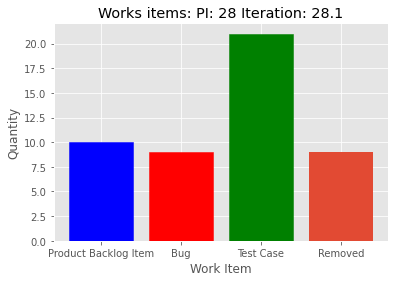

PBIs: 16
Bugs: 2
Test Cases: 21
Removed: 5


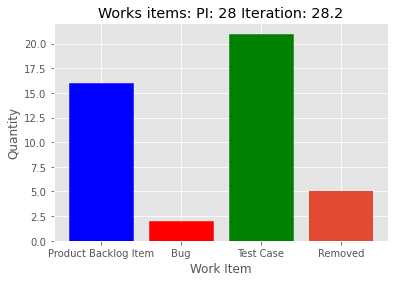

PBIs: 13
Bugs: 2
Test Cases: 1
Removed: 1


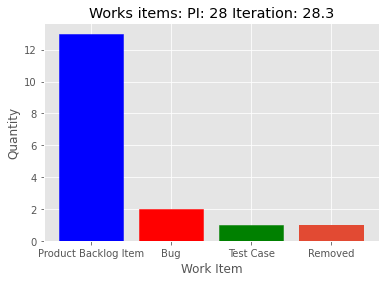

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

instance = WorkItem
items = instance.get_work_items_from_query()

print (' ')

for iteration in items:    

    # Data to plot
    pbis = 0
    bugs = 0
    testCases = 0
    removed = 0

    for work_item in iteration.work_items:    
        
        item = str(work_item.id) + ' -- ' + work_item.fields['System.WorkItemType'] + ' -- ' + work_item.fields['System.State'] + ' -- ' + work_item.fields['System.Title']
        workItemType = work_item.fields['System.WorkItemType']
        state = work_item.fields['System.State']

        if (state != 'Removed'):
            
            if workItemType == 'Product Backlog Item':
                pbis += 1

            if workItemType == 'Bug':
                bugs += 1

            if workItemType == 'Test Case':
                testCases += 1
        else:
            removed += 1

    x = ['Product Backlog Item', 'Bug', 'Test Case', 'Removed']
    workItem = [pbis, bugs, testCases, removed]

    print ('PBIs: ' + str(pbis))
    print ('Bugs: ' + str(bugs))
    print ('Test Cases: ' + str(testCases))
    print ('Removed: ' + str(removed))

    x_pos = [i for i, _ in enumerate(x)]

    barlist = plt.bar(x_pos, workItem)
    plt.xlabel("Work Item")
    plt.ylabel("Quantity")
    plt.title("Works items: " + "PI: " + str(iteration.pi) + ' ' + "Iteration: " + str(iteration.iteration))

    barlist[0].set_color('b')
    barlist[1].set_color('r')
    barlist[2].set_color('g')

    plt.xticks(x_pos, x)

    plt.show()

## Work item Effort

Results: 252
Results: 214
Results: 89
 


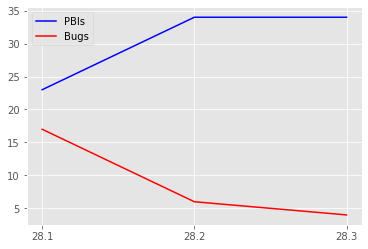

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

instance = WorkItem
items = instance.get_work_items_from_query()

print (' ')

x = []
pbis = []
bugs = []

for iteration in items:

    # Data to plot
    pbi = 0
    bug = 0

    for work_item in iteration.work_items:   
        
        item = str(work_item.id) + ' -- ' + work_item.fields['System.WorkItemType'] + ' -- ' + work_item.fields['System.State'] + ' -- ' + work_item.fields['System.Title']
        workItemType = work_item.fields['System.WorkItemType']
        state = work_item.fields['System.State']

        effort_in_dict =  "Microsoft.VSTS.Scheduling.Effort" in work_item.fields

        if (state != 'Removed' and effort_in_dict and (workItemType == 'Product Backlog Item' or workItemType == 'Bug')):
          
            effort = work_item.fields['Microsoft.VSTS.Scheduling.Effort']
            
            if workItemType == 'Product Backlog Item':
                pbi += effort

            if workItemType == 'Bug':
                bug += effort

    x.append(iteration.iteration)
    pbis.append(pbi)
    bugs.append(bug)
    
# plot lines
plt.plot(x, pbis, label = "PBIs", color="b")
plt.plot(x, bugs, label = "Bugs", color="r")
plt.legend()
plt.show()

## Work item resource distribution (Effort)

Results: 252
Results: 214
Results: 89
 
Juan: 10.0
Ana: 12.0
Eric: 2.0
Lucia: 5.0
Khanh: 8.0
Rafael: 3.0


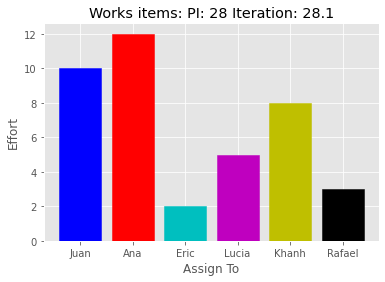

Juan: 14.0
Ana: 10.0
Eric: 3.0
Lucia: 5.0
Khanh: 8.0
Rafael: 0


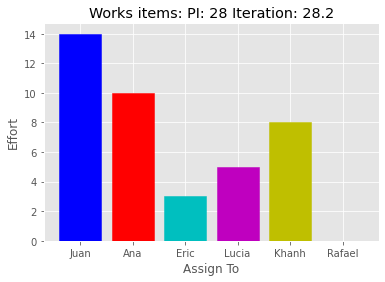

Juan: 15.0
Ana: 7.0
Eric: 3.0
Lucia: 5.0
Khanh: 8.0
Rafael: 0


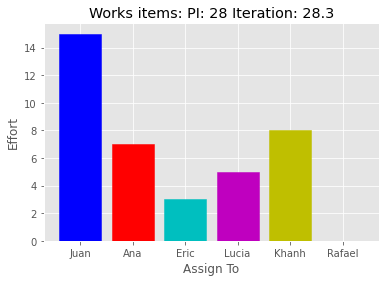

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

instance = WorkItem
items = instance.get_work_items_from_query()

print (' ')

for iteration in items:

    # Data to plot        
    ana = 0
    juan = 0
    khanh = 0
    lucia = 0
    eric = 0
    rafael = 0

    for work_item in iteration.work_items: 
        
        item = str(work_item.id) + ' -- ' + work_item.fields['System.WorkItemType'] + ' -- ' + work_item.fields['System.State'] + ' -- ' + work_item.fields['System.Title']            
        state = work_item.fields['System.State']

        effort_in_dict =  "Microsoft.VSTS.Scheduling.Effort" in work_item.fields
        assignedTo_in_dict =  "System.AssignedTo" in work_item.fields
        workItemType = work_item.fields['System.WorkItemType']

        if (state != 'Removed' and effort_in_dict and assignedTo_in_dict and (workItemType == 'Product Backlog Item' or workItemType == 'Bug')):
            
            assignedTo = work_item.fields['System.AssignedTo']['displayName']                
            effort = work_item.fields['Microsoft.VSTS.Scheduling.Effort']
            
            if assignedTo == 'Juan Rojas':
                juan += effort

            if assignedTo == 'Ana Tavera':
                ana += effort

            if assignedTo == 'Khanh Lu':
                khanh += effort

            if assignedTo == 'Lucia Vallejos':
                lucia += effort

            if assignedTo == 'Eric Rearte':
                eric += effort
                
            if assignedTo == 'Rafael Cruz Mendoza':
                rafael += effort

    x = ['Juan', 'Ana', 'Eric', 'Lucia', 'Khanh', 'Rafael']
    workItem = [juan, ana, eric, lucia, khanh, rafael]

    print ('Juan: ' + str(juan))
    print ('Ana: ' + str(ana))
    print ('Eric: ' + str(eric))
    print ('Lucia: ' + str(lucia))
    print ('Khanh: ' + str(khanh))
    print ('Rafael: ' + str(rafael))

    x_pos = [i for i, _ in enumerate(x)]

    barlist = plt.bar(x_pos, workItem)
    plt.xlabel("Assign To")
    plt.ylabel("Effort")
    plt.title("Works items: " + "PI: " + str(iteration.pi) + ' ' + "Iteration: " + str(iteration.iteration))

    barlist[0].set_color('b')
    barlist[1].set_color('r')
    barlist[2].set_color('c')
    barlist[3].set_color('m')
    barlist[4].set_color('y')
    barlist[5].set_color('k')

    plt.xticks(x_pos, x)

    plt.show()

## Task resource distribution (Count)

Results: 252
Results: 214
Results: 89
 
Juan: 40
Ana: 15
Eric: 29
Lucia: 18
Khanh: 19
None: 0


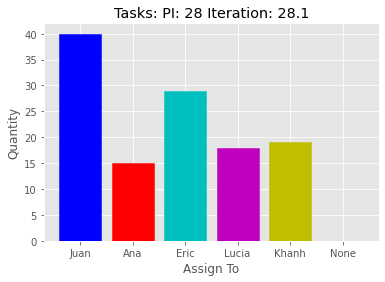

Juan: 34
Ana: 20
Eric: 26
Lucia: 21
Khanh: 17
None: 0


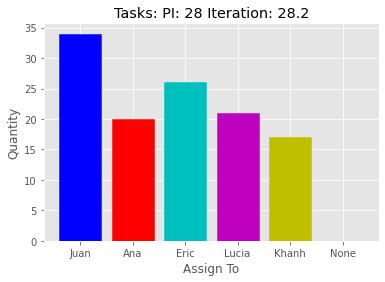

Juan: 20
Ana: 10
Eric: 10
Lucia: 10
Khanh: 13
None: 6


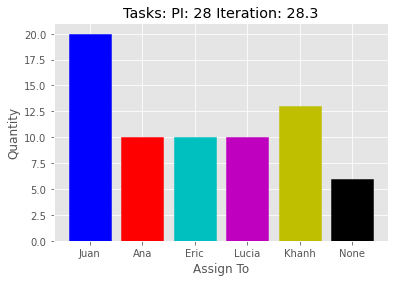

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

instance = WorkItem
items = instance.get_work_items_from_query()

print (' ')

for iteration in items:

    # Data to plot        
    ana = 0
    juan = 0
    khanh = 0
    lucia = 0
    eric = 0
    #rafael = 0
    none = 0

    for work_item in iteration.work_items: 
        
        item = str(work_item.id) + ' -- ' + work_item.fields['System.WorkItemType'] + ' -- ' + work_item.fields['System.State'] + ' -- ' + work_item.fields['System.Title']            
        state = work_item.fields['System.State']
        workItemType = work_item.fields['System.WorkItemType']
        assignedTo_in_dict =  "System.AssignedTo" in work_item.fields
            
        if (state != 'Removed' and workItemType == 'Task'):           
            
            if assignedTo_in_dict:
                assignedTo = work_item.fields['System.AssignedTo']['displayName']        

                if assignedTo == 'Juan Rojas':
                    juan += 1

                if assignedTo == 'Ana Tavera':
                    ana += 1

                if assignedTo == 'Khanh Lu':
                    khanh += 1

                if assignedTo == 'Lucia Vallejos':
                    lucia += 1

                if assignedTo == 'Eric Rearte':
                    eric += 1

                #if assignedTo == 'Rafael Cruz Mendoza':
                #    rafael += 1
            else:            
                none += 1                

    x = ['Juan', 'Ana', 'Eric', 'Lucia', 'Khanh', 'None']
    workItem = [juan, ana, eric, lucia, khanh, none]

    print ('Juan: ' + str(juan))
    print ('Ana: ' + str(ana))
    print ('Eric: ' + str(eric))
    print ('Lucia: ' + str(lucia))
    print ('Khanh: ' + str(khanh))
    #print ('Rafael: ' + str(rafael))
    print ('None: ' + str(none))

    x_pos = [i for i, _ in enumerate(x)]

    barlist = plt.bar(x_pos, workItem)
    plt.xlabel("Assign To")
    plt.ylabel("Quantity")
    plt.title("Tasks: " + "PI: " + str(iteration.pi) + ' ' + "Iteration: " + str(iteration.iteration))

    barlist[0].set_color('b')
    barlist[1].set_color('r')
    barlist[2].set_color('c')
    barlist[3].set_color('m')
    barlist[4].set_color('y')
    barlist[5].set_color('k')

    plt.xticks(x_pos, x)

    plt.show()

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import json

instance = WorkItem
items = instance.get_work_items_from_query()

print (' ')

filters = []
#filters = ['R28.1_JUL1921', 'Env-SYS']
#filters = ['zApp-AppliedDX.UPG']
#filters = ['zApp-AppliedEquipmentOrdering.Web']

for iteration in items:
    
    print (' ')
    print("PI: " + str(iteration.pi) + ' -- ' + "Iteration: " + str(iteration.iteration))
    print (' ')
    
    for work_item in iteration.work_items: 
        
        item = work_item.fields['System.WorkItemType'] +  ' ' + str(work_item.id)+  ': ' + work_item.fields['System.Title']
        state = work_item.fields['System.State']
        workItemType = work_item.fields['System.WorkItemType']
            
        if (state != 'Removed' and (workItemType == 'Product Backlog Item' or workItemType == 'Bug')):           
            
            tags_in_dict =  "System.Tags" in work_item.fields        
            element = ''
            
            if tags_in_dict:          
                element = work_item.fields['System.Tags']
                                                           
            tags = element.split("; ")
                
            item = {
              "workItem": item,
              "tags": tags
            }
            
            if filters:
                for el in filters:
                    if el in tags:
                        #print(el)
                        json_data = json.dumps(item)            
                        json_object = json.loads(json_data)
                        json_formatted_str = json.dumps(json_object, indent=2)
                        print(json_formatted_str)
            
            else:
                json_data = json.dumps(item)            
                json_object = json.loads(json_data)
                json_formatted_str = json.dumps(json_object, indent=2)
                print(json_formatted_str)
           

Results: 252
Results: 214
Results: 89
 
 
PI: 28 -- Iteration: 28.1
 
{
  "workItem": "Product Backlog Item 492378: National Accounts- Sell Price, add logic to Action=Update Prices",
  "tags": [
    "Env-DEV2",
    "Env-SIT",
    "R28.1_JUL1921",
    "zApp-AppliedDX.UPG",
    "zApp-EstimateDatabase",
    "zApp-EstimateDatabase.Cloud",
    "zDeployed"
  ]
}
{
  "workItem": "Product Backlog Item 519287: Maintenance and Support Work 28.1",
  "tags": [
    "Env-QA",
    "Env-SIT",
    "zApp-AppliedDX.UPG",
    "zApp-DocGenTemplates",
    "zApp-UPG-Order-API",
    "zDeployed"
  ]
}
{
  "workItem": "Bug 526238: Mod Shop Pricing - Pricing does not update if the mod shop item is removed from the unit",
  "tags": [
    "R28.1_JUL1921"
  ]
}
{
  "workItem": "Bug 521003: Residential Split HSPF information lost when uncheck and check the outdoor unit for heatpump",
  "tags": [
    "R28.1_JUL1921"
  ]
}
{
  "workItem": "Bug 514271: Selection Wizard - L526 Single Phase Models will not show",
  "tags